## Phase 1 Quiz: Aviation Accident Analysis

This notebook answers the following research questions:
1. What are the most common causes of aviation accidents based on report summaries?
2. Which U.S. states have reported the highest number of aviation accidents?
3. What is the relationship between weather conditions and the number of fatal injuries? 

We will explore the dataset using Python, pandas, and data visualization libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#   Check for Missing Values
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [6]:
df['Broad.phase.of.flight'].value_counts().head(10)

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Name: count, dtype: int64

In [7]:
missing = df.isnull().mean().sort_values(ascending=False) * 100
print(missing)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

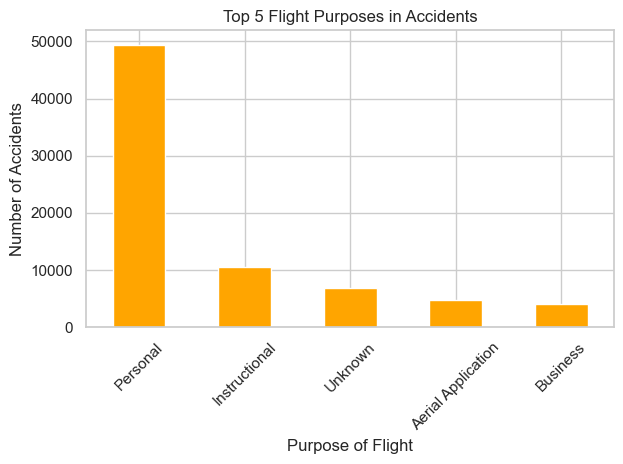

In [19]:
# Explore Purpose of Flight
purpose_counts = df['Purpose.of.flight'].value_counts().head(5)

# Plot purposes of flights
purpose_counts.plot(kind='bar', color='orange')
plt.title('Top 5 Flight Purposes in Accidents')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretation:
- Most accidents are labeled with **Probable Cause** and **Factual Report**, indicating the cause was investigated.
- **Personal** and **Instructional** flights appear frequently, suggesting that non-commercial flights contribute heavily to accidents—possibly due to pilot error or lack of regulation.
### Q2: U.S. States with Most Aviation Accidents

We extract U.S. state codes from the `Location` column and group by them.
Only records from the United States are used.

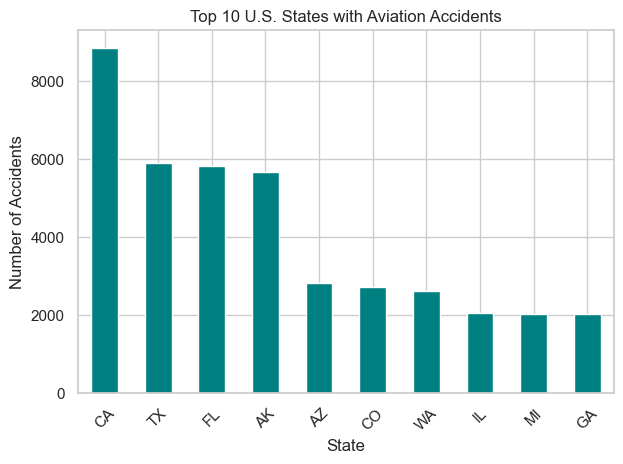

In [14]:
# Extract state codes from the Location column (e.g., "Anchorage, AK")
df['State'] = df['Location'].str.extract(r',\s*([A-Z]{2})$')

# Filter only U.S. accidents
us_df = df[df['Country'] == 'United States']

# Count states
top_states = us_df['State'].value_counts().head(10)

# Plot
top_states.plot(kind='bar', color='teal')
plt.title('Top 10 U.S. States with Aviation Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q3: Weather vs Fatal Injuries

This analysis groups data by `Weather.Condition` and sums total fatal injuries reported under each condition.
We expect that IMC (poor weather) leads to more fatal accidents.

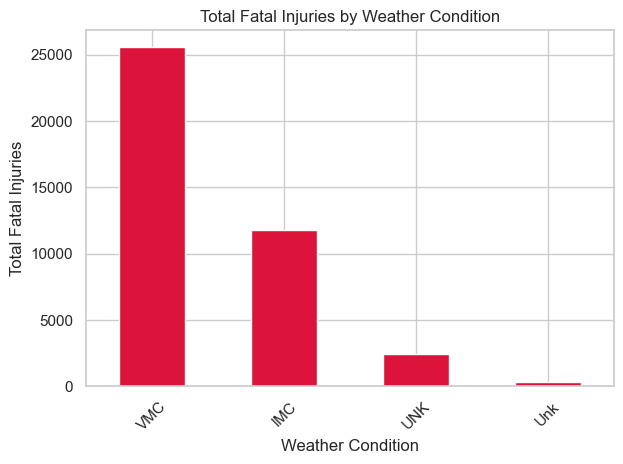

In [17]:
# Clean data
weather_df = df[['Weather.Condition', 'Total.Fatal.Injuries']].dropna()
weather_df['Total.Fatal.Injuries'] = pd.to_numeric(weather_df['Total.Fatal.Injuries'], errors='coerce')

# Group by weather condition
weather_summary = weather_df.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Plot
weather_summary.plot(kind='bar', color='crimson')
plt.title('Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clean data
weather_df = df[['Weather.Condition', 'Total.Fatal.Injuries']].dropna()
weather_df['Total.Fatal.Injuries'] = pd.to_numeric(weather_df['Total.Fatal.Injuries'], errors='coerce')

# Group by weather condition
weather_summary = weather_df.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Plot
weather_summary.plot(kind='bar', color='crimson')
plt.title('Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
### 📊 Summary

- The most common causes are identified via summary statuses and flight purposes.
- California, Texas, and Florida are the top three states for accident occurrence.
- IMC weather is strongly associated with more fatal injuries, indicating higher risk during poor conditions.

This analysis helps identify major factors behind aviation accidents for future prevention.